# Analiza piłkarzy na podstawie danych z gry FIFA 24

## Autorzy projektu
- Oktawian Kausz (*217601*)
- Izabela Kołodziejska (*217260*)
- Piotr Kula (*217302*)
- Kamil Marszałek (*217241*)

## Streszczenie
Poznanymi metodami statystycznymi uporządkowaliśmy piłkarzy występujących w grze **FIFA 24**. Dane pozyskaliśmy z dostępnej bazy danych w serwisie [Kaggle](https://www.kaggle.com/datasets/rehandl23/fifa-24-player-stats-dataset?resource=download) udostępnionych na licencji Apache 2.0. W celu przeanalizowania dostępnych danych skorzystaliśmy z takich metod jak <u>TOPSIS</u>, <u>SSW</u> oraz <u>regresji liniowej</u> co umożliwiło nam dojście do później opisanych wniosków.

## Słowa kluczowe
- **TOPSIS** - metoda wielokryterialnej analizy decyzyjnej, która służy do wyboru najlepszego wariantu spośród zestawu alternatyw
- **SSW** - oznacza "Sum of Squares Within" (Suma Kwadratów Wewnątrzgrupowych), jest jednym z komponentów analizy wariancji (ANOVA), która służy do analizy różnic między średnimi kilku grup danych
- **Regresja liniowa** - technika statystyczna wykorzystywana do modelowania związku między jedną lub więcej zmiennymi niezależnymi (zwanych również predyktorami) a zmienną zależną za pomocą prostej funkcji liniowej

## Wprowadzenie

W świecie sportu analiza danych staje się coraz bardziej powszechną praktyką, która pozwalaja zarówno zawodnikom, jak i zespołom trenerskim na podejmowanie bardziej świadomych decyzji. W ramach niniejszego badania, skupiliśmy się na analizie piłkarzy występujących w grze FIFA 24.

### Przedmiot badania
Przedmiotem badania są piłkarze z całego świata, którzy występują w grze FIFA 24.


### Cel i zakres badania 
Celem naszego badania jest porównanie piłkarzy z różnych krajów oraz klubów. Postawiliśmy sobie za cel uporządkowanie ich od najlepszego do najgorszego stosując trzy metody statystyczne.


### Zmienne wybrane do analizy

Z dostępnych danych zostały wybrane jedynie te, które zostały uznane za znaczące a niektóre z nich, takie jak *ball_uncontrol* powstały z ich odpowiadających cech w celu uzyskania destymulanty.

Opis danych występujących w bazie:
- **player** - imię oraz nazwisko piłkarza
- **country** - narodowość lub kraj pochodzenia piłkarza
- **height** - wzrost piłkarza w centymetrach
- **age** - wiek piłkarza
- **club** - klub w którym piłkarz aktualnie gra
- **dribbling** - umiejętności piłkarza w drybblingu
- **reactions** - czas reakcji piłkarza
- **interceptions** - umiejętność piłkarza w przechwytywaniu podań
- **vision** - zdolność przeglądu pola gry piłkarza na boisku
- **stamina** - poziom wytrzymałości piłkarza
- **strength** - poziom siły piłkarza
- **balance** - balans piłkarza podczas gry
- **sprint_speed** - prędkość piłkarza podczas sprintów
- **agility** - poziom zwinności piłkarza
- **ball_uncontrol** - poziom braku kontroli nad piłką piłkarza
- **instability** - poziom niestabilności podczas gry

Za stymulante służą następujące dane: *dribbling*, *reactions*, *interceptions*, *vision*, *stamina*, *strength*, *balance*, *sprint_speed* oraz *agility*. Destymulantą jest z kolei *ball_uncontrol* oraz *instability*.

## Import odpowiednich bibliotek oraz przegląd danych

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from plotly.offline import iplot, plot
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
seed = 2024

In [2]:
data = pd.read_excel('FIFA_MAD_dane.xlsx')
data.head()

,player,country,height,age,club,dribbling,reactions,interceptions,vision,stamina,strength,balance,sprint_speed,agility,ball_uncontrol,instability,age_destimulant
0,Cristian Castro Devenish,Colombia,192,22,Atl. Nacional,43,68,65,30,55,86,40,52,43,45,50,6
1,Silaldo Taffarel,Brazil,181,31,Corinthians,70,70,70,64,87,81,42,67,65,31,46,3
2,Thomas Dähne,Germany,193,29,Holstein Kiel,12,65,20,49,38,68,41,48,36,75,52,1
3,Michael Sollbauer,Austria,187,33,SK Rapid Wien,48,64,66,29,73,82,56,63,57,54,30,5
4,Diego Segovia,Uruguay,191,23,Independiente,8,50,12,38,28,64,24,31,34,86,66,5


In [3]:
data.describe()

,height,age,dribbling,reactions,interceptions,vision,stamina,strength,balance,sprint_speed,agility,ball_uncontrol,instability,age_destimulant
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,181.670481,26.316670,56.121986,61.953881,47.390776,54.460658,63.373174,65.379335,64.067418,64.953353,63.775392,41.093469,41.384263,4.232529
std,6.829837,4.730284,18.767351,8.884548,20.452747,13.701261,16.104265,12.624378,14.494980,15.109394,14.854123,16.563054,12.018839,2.700412
min,156.000000,17.000000,5.000000,32.000000,3.000000,10.000000,14.000000,25.000000,20.000000,13.000000,21.000000,6.000000,4.000000,0.000000
25%,177.000000,23.000000,51.000000,56.000000,28.000000,45.000000,56.000000,58.000000,56.000000,57.000000,56.000000,31.000000,33.000000,2.000000
50%,182.000000,26.000000,62.000000,62.000000,54.000000,56.000000,66.000000,66.000000,66.000000,68.000000,66.000000,37.000000,40.000000,4.000000
75%,186.000000,30.000000,68.000000,68.000000,64.000000,65.000000,74.000000,74.000000,74.000000,75.000000,74.000000,45.000000,48.000000,6.000000
max,204.000000,41.000000,95.000000,93.000000,89.000000,94.000000,95.000000,96.000000,95.000000,97.000000,93.000000,92.000000,87.000000,13.000000


### Wstępna analiza danych

In [4]:
values = pd.read_excel('FIFA_MAD_dane.xlsx', sheet_name='wartosci')
values.head(9)

,,dribbling,reactions,interceptions,vision,stamina,strength,balance,sprint_speed,agility,ball_uncontrol,instability
0,Średnia,56.12,61.95,47.39,54.46,63.37,65.38,64.07,64.95,63.78,41.09,41.38
1,Odchylenie standardowe,18.77,8.88,20.45,13.70,16.10,12.62,14.49,15.11,14.85,16.56,12.02
2,Mediana,62.00,62.00,54.00,56.00,66.00,66.00,66.00,68.00,66.00,37.00,40.00
3,Kwartyl 25%,51.00,56.00,28.00,45.00,56.00,58.00,56.00,57.00,56.00,31.00,33.00
4,Kwatyl 50%,62.00,62.00,54.00,56.00,66.00,66.00,66.00,68.00,66.00,37.00,40.00
5,Kwatyl 75%,68.00,68.00,64.00,65.00,74.00,74.00,74.00,75.00,74.00,45.00,48.00
6,Minimum,5.00,32.00,3.00,10.00,14.00,25.00,20.00,13.00,21.00,6.00,4.00
7,Maksimum,95.00,93.00,89.00,94.00,95.00,96.00,95.00,97.00,93.00,92.00,87.00
8,Skośność,-1.22,-0.09,-0.41,-0.34,-0.95,-0.42,-0.64,-0.94,-0.67,1.40,0.50


### Boxploty

Poniżej przedstawiono graficzny rozkład posiadanych przez nas cech statystycznych. W przypadku niektórych z nich, takich jak driblling można zauważyć dużą część wartości odstających, które pokazują jak zróżnicowane są dane. Nie świadczą one o błędach pomiarowych.

<Axes: >

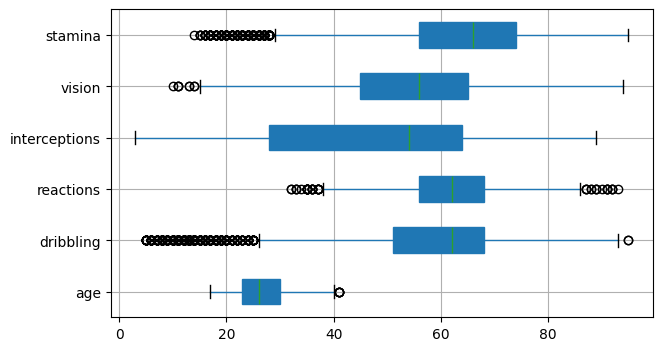

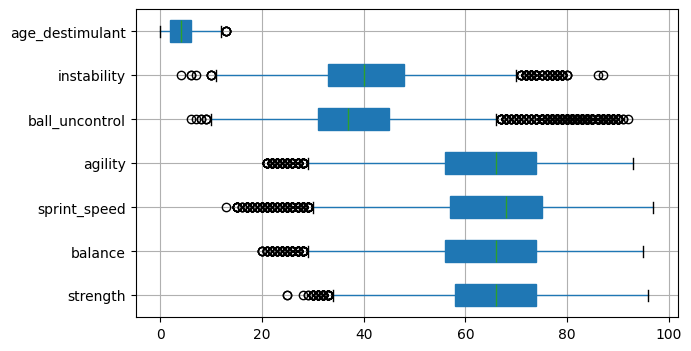

In [5]:
df = pd.DataFrame(data)
plt.figure(figsize=(7, 4))
df.boxplot(["age", "dribbling", "reactions", "interceptions", "vision", "stamina"], patch_artist=True, vert= False)
plt.figure(figsize=(7, 4))
df.boxplot(["strength", "balance", "sprint_speed", "agility", "ball_uncontrol", "instability", "age_destimulant"], patch_artist=True, vert= False)

### Kraje z których pochodzą piłkarze

Histogram z krajami z których pochodzą piłkarze z naszej bazy danych pokazuje, że najwięcej z nich jest kolejno z Anglii, Niemiec oraz Hiszpanii.

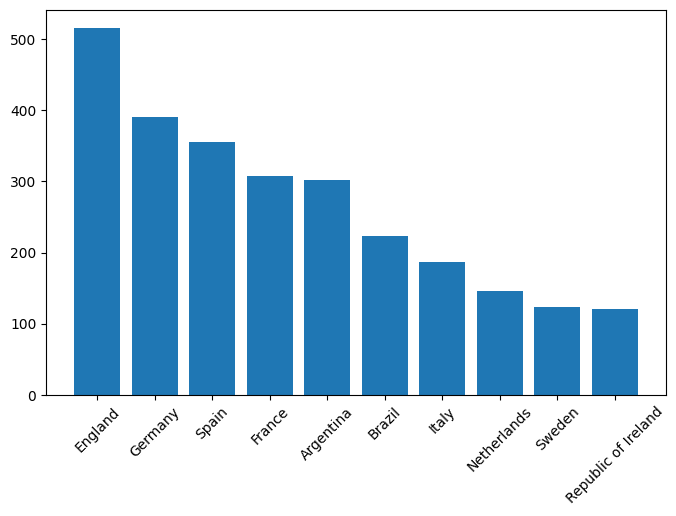

In [6]:
df = pd.DataFrame(data)
country_counts = df['country'].value_counts()
top_10_countries = country_counts.head(10)
plt.figure(figsize=(8, 5))
plt.bar(top_10_countries.index, top_10_countries)
plt.xticks(rotation=45)
plt.show()

## Usuwanie duplikatów

In [7]:
print(f"The Number of duplicated : {data.duplicated().sum()}")

The Number of duplicated : 3


W naszej bazie danych znaleźliśmy 3 duplikaty, które należy usunąć. Skorzystamy w tym celu z funkcji *drop_duplicates*, która nam to umożliwi.

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
print(f"The Number of duplicated : {data.duplicated().sum()}")

The Number of duplicated : 0


Po wykonaniu odpowiedniego polecenia, usunięto zduplikowane dane.

## Standaryzacja danych do użycia w analizie składowych głównych (PCA)

In [10]:
data_with_numbers = data.drop(['player', 'country', 'club', 'age', 'height'], axis=1)
scaler = StandardScaler()
df = scaler.fit_transform(data_with_numbers)
pca = PCA(n_components=3)
pca.fit(df)

PCA(n_components=3)

## Interpretacja wyników: które cechy mają największy wpływ na róznice między piłkarzami. 
Wykorzystywana jest analiza współczynników ładunku głównych składowych PC. Wartości te określają jak bardzo każda cecha przyczynia się do każdej głównej składowej.
- Wartości bliskie zeru wskazują na to, że dana cecha ma mały wpływ na dany komponent główny.
- Dodatnie wartości wskazują na pozytywną korelację między daną cechą a danym komponentem głównym, podczas gdy ujemne wartości wskazują na negatywną korelację.
- Im większa wartość bezwzględna, tym większy wpływ ma dana cecha na dany komponent główny.

In [11]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=data_with_numbers.columns)
print(loadings_df)

   dribbling  reactions  interceptions    vision   stamina  strength  \
0  -0.374889  -0.231982      -0.204071 -0.311231 -0.332313 -0.045025   
1   0.103486  -0.359062      -0.307882  0.032552 -0.139847 -0.601639   
2   0.006688   0.462706      -0.507264  0.469044 -0.358097 -0.158118   

    balance  sprint_speed   agility  ball_uncontrol  instability  \
0 -0.299209     -0.307944 -0.332540        0.377876     0.327564   
1  0.353684      0.206099  0.299655        0.000458     0.214614   
2 -0.089298     -0.253262 -0.023869        0.018644    -0.286795   

   age_destimulant  
0         0.098222  
1         0.282074  
2         0.004497  


## Wnioski
- pierwsza główna składowa (indeks 0): największy wpływ na tę składową mają zmienne <b>dribbling, vision, stamina, balance, sprint_speed, agility</b>. Wszystkie te zmienne mają ujemne ładunki, co oznacza, że im wyższa jest wartość tych zmiennych, tym niższa jest wartość tej głównej składowej. Zmienne <b>ball_uncontrol i instability</b> mają dodatni ładunek, co oznacza, że im wyższa jest wartość tych zmiennych, tym wyższa jest wartość tej głównej składowej.
- druga główna składowa (indeks 1) : zmienne ujemne o największym wpływie: <b>reactions, interceptions, strength</b> zmienne dodatnie: <b>balance, agility</b>
- trzecia główna składowa (indeks 2): ujemne zmienne: <b>interceptions, stamina</b> dodatnie zmienne: <b>reactions, vision</b>
### Cechy takie jak reactions, interceptions, instability najbardziej wpływają na różnice między piłkarzami.

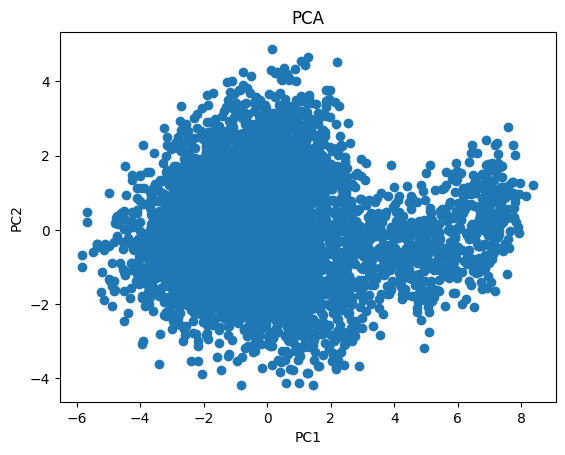

In [12]:
pca_data = pca.transform(df)
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

# Metoda TOPSIS

Metoda TOPSIS (ang. Technique for Order Preference by Similarity to Ideal Solution) jest wielokryterialną metodą analizy decyzyjnej, służącą do porządkowania i wyboru wariantów decyzyjnych w oparciu o zestaw kryteriów.

Na początek wyznaczamy znormalizowaną macierz decyzyjną: $R = (r_{ij}) $

$$ r_{ij} = \frac{x_{ij}}{\sqrt{\sum_{k=1}^m x_{kj}^2}} $$

Następnie wyznaczamy ważoną znormalizowaną macierz decyzyjną $ V = (v_{ij}) $

$$ v_{ij} = r_{ij} \cdot w_j $$

In [13]:
scaled_numeric_data = scaler.fit_transform(data_with_numbers) 
scaled_numeric_data = np.abs(scaled_numeric_data)
scaled_numeric_data

array([[0.69981555, 0.68073828, 0.86111468, ..., 0.23606446, 0.71672886,
        0.65424596],
       [0.73914368, 0.90589305, 1.10560714, ..., 0.60910223, 0.38397445,
        0.45664177],
       [2.35195392, 0.34300612, 1.33931747, ..., 2.04713593, 0.88310607,
        1.19723358],
       ...,
       [2.07151333, 2.93228597, 0.50804311, ..., 2.11832845, 2.86038108,
        0.45664177],
       [1.32538633, 3.15744074, 0.89923104, ..., 1.69574511, 2.94356968,
        2.13542959],
       [1.00561761, 1.69393474, 1.33931747, ..., 1.57500701, 2.61081527,
        3.24631732]])

### Liczenie wag

In [14]:
preferences = {
    'dribbling': 5,
    'reactions': 5,
    'interceptions': 2,
    'vision': 5,
    'stamina': 4,
    'strength': 4,
    'balance': 5,
    'sprint_speed': 4,
    'agility': 5,
    'ball_uncontrol': -2,
    'instability': -5,
    'age_destimulant': -2
}

total_preference = sum(preferences.values())
normalized_preferences = {feature: weight/total_preference for feature, weight in preferences.items()}

weights = np.array(list(normalized_preferences.values()))

print("Wagi:")
print(weights)

Wagi:
[ 0.16666667  0.16666667  0.06666667  0.16666667  0.13333333  0.13333333
  0.16666667  0.13333333  0.16666667 -0.06666667 -0.16666667 -0.06666667]


https://www.geeksforgeeks.org/topsis-method-for-multiple-criteria-decision-making-mcdm/ tu jest zrobione inaczej

In [15]:
#weights = [5, 5, 2, 5, 4, 4, 5, 2, 5, -2, -5, -2]
weighed_data = scaled_numeric_data * np.array(weights)

weighed_data

array([[ 0.11663592,  0.11345638,  0.05740765, ..., -0.01573763,
        -0.11945481, -0.0436164 ],
       [ 0.12319061,  0.15098217,  0.07370714, ..., -0.04060682,
        -0.06399574, -0.03044278],
       [ 0.39199232,  0.05716769,  0.08928783, ..., -0.13647573,
        -0.14718434, -0.07981557],
       ...,
       [ 0.34525222,  0.48871433,  0.03386954, ..., -0.1412219 ,
        -0.47673018, -0.03044278],
       [ 0.22089772,  0.52624012,  0.05994874, ..., -0.11304967,
        -0.49059495, -0.14236197],
       [ 0.16760294,  0.28232246,  0.08928783, ..., -0.10500047,
        -0.43513588, -0.21642115]])

Wyznaczamy idealne $A^+ $ i nieidealne $A^-$ rozwiązanie

$$ A^+ = (v_1^+,v_2^+,\ldots,v_n^+) = \{(\max_i v_{ij}~|~j\in B)\}, \{(\min_i v_{ij}~|~j\in C)\} $$ $$
A^- = (v_1^-,v_2^-,\ldots,v_n^-) = \{(\min_i v_{ij}~|~j\in B)\}, \{(\max_i v_{ij}~|~j\in C)\}
$$

In [16]:
ideal_solution = np.max(weighed_data, axis=0)
non_ideal_solution = np.min(weighed_data, axis=0)

Obliczamy odległości od idealnego oraz nieidealnego rozwiązania

odległości każdego wariantu decyzyjnego $A_i$ od rozwiązania
idealnego$A^+$ $$
d_i^+ = \sqrt{\sum_{j=1}^n (v_{ij} - v_j^+)^2} $$oraz antyidealnego $A^-$  $$
d_i^- = \sqrt{\sum_{j=1}^n (v_{ij} - v_j^-)^2}
$$

In [17]:
distance_to_ideal = np.sqrt(np.sum((weighed_data - ideal_solution) ** 2, axis=1))
distance_to_non_ideal = np.sqrt(np.sum((weighed_data - non_ideal_solution) ** 2, axis=1))

Obliczenie wyniku TOPSIS

Wyznaczenie współczynnika względnej bliskości wariantów decyzyjnych$A_i$ 
do rozwiązania idealnego $A^+$
$$
RC_i = \frac{d_i^-}{d_i^++d_i^-}
$$

Ranking wariantów decyzyjnych względem wartości współczynnika
względnej bliskości wariantów decyzyjnych do rozwiązania idealnego –$~RC_i$. Im
wyższa wartość tego współczynnika tym lepszy wariant decyzyjny. Najlepszym wariantem jest ten z najwyższą wartości$~RC_i$. 

In [18]:
topsis_score = distance_to_non_ideal / (distance_to_ideal + distance_to_non_ideal)

Dodanie kolumny z wynikiem TOPSIS do danych i sortowanie

In [19]:
data['TOPSIS Score'] = topsis_score
sorted_data = data.sort_values(by='TOPSIS Score', ascending=False)
print(sorted_data)
#sorted_data.to_excel("posortowane_wedlug_topsis.xlsx", index=False)

                     player         country  height  age             club  \
850           Edoardo Sarri           Italy     187   24            Bari    
3940      Marcel Zapytowski          Poland     187   22   Korona Kielce    
2920        Paul Tschernuth         Austria     186   21      Heidenheim    
2676  Quentin Galvez-Diarra          France     188   21          Pau FC    
1468                Xing Yu        China PR     195   27    Rongcheng FC    
...                     ...             ...     ...  ...              ...   
430            Lee Gi Hyeok  Korea Republic     184   23     Jeju United    
4613       Roméo Monticelli         Belgium     180   17   Sp. Charleroi    
4412           Ewil Murillo        Colombia     178   23   Atl. Nacional    
992      Fritiof Hellichius          Sweden     184   20  IFK Norrköping    
2312       Oliver Arblaster         England     178   19   Sheffield Utd    

      dribbling  reactions  interceptions  vision  stamina  strength  balan

## Wnioski
- **Najlepsi:**  Mubarak Wakaso, Luis Advíncula, Anuar
- **Najgorsi:** Edoardo Sarri, Quentin Galvez-Diarra, Paul Tschernuth<br>

Metoda $TOPSIS$ całkiem chybi z oceną piłkarzy. Dane zawarte w tym projekcie są danymi realistycznymi i dwie pozostałe metody potwierdzają nasze predykcje w odniesiu do piłkarzy, którzy powinni znaleźć się w pierwszej dziesiątce. Niestety w rankingu wykorzystującym powyższą metodę statystyczną wyniki są nieprawdziwe.  
## Wykresy

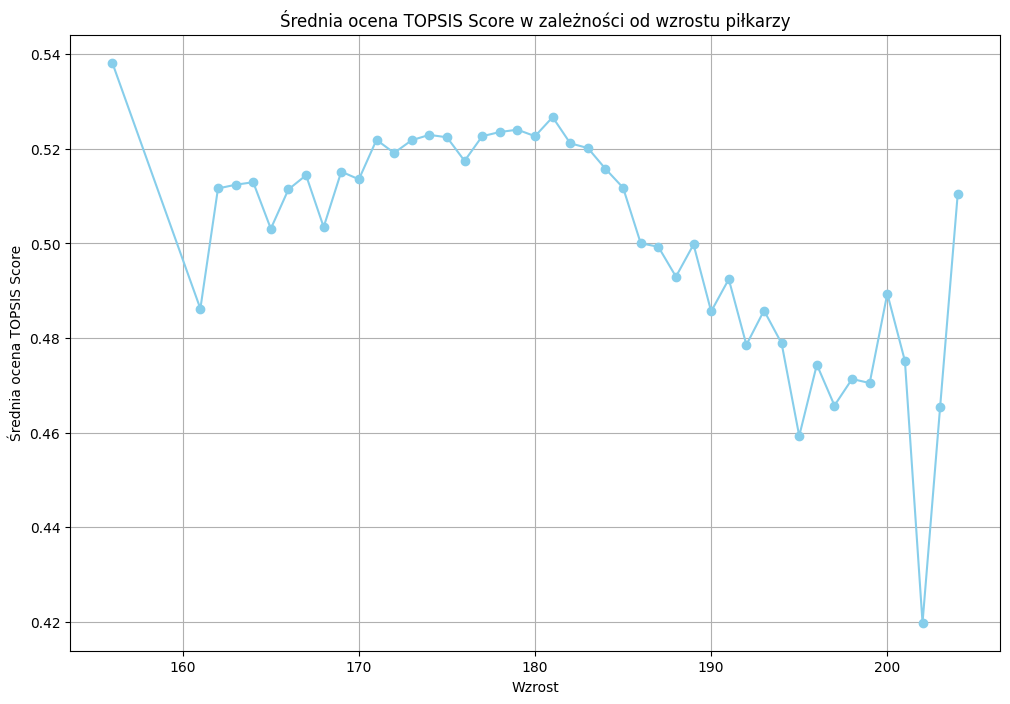

In [71]:
average_scores_by_height = sorted_data.groupby('height')['TOPSIS Score'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_height.index, average_scores_by_height.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Wzrost')
plt.ylabel('Średnia ocena TOPSIS Score')
plt.title('Średnia ocena TOPSIS Score w zależności od wzrostu piłkarzy')
plt.grid(True)
plt.show()

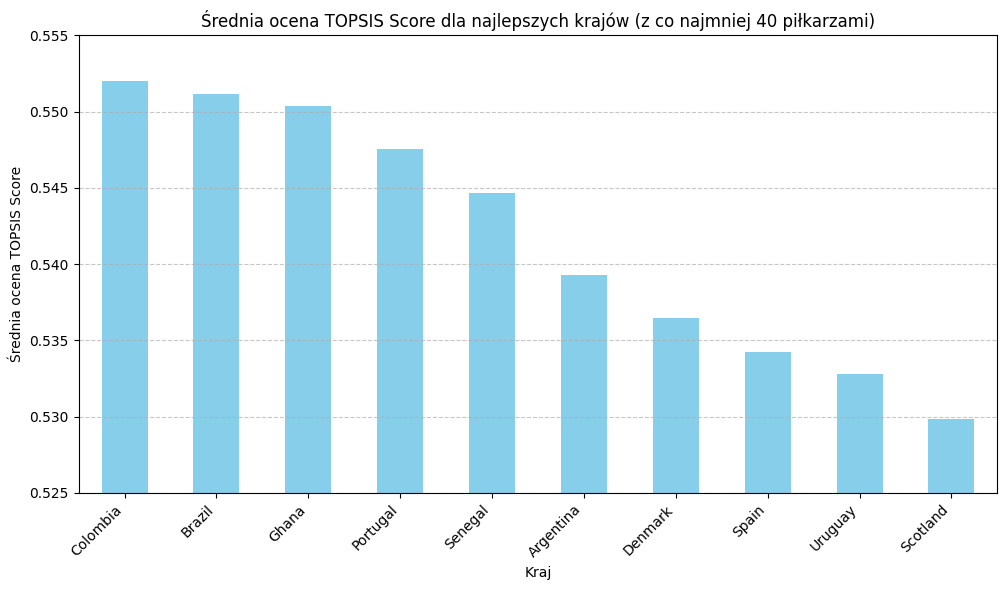

In [23]:
players_count_by_country = sorted_data['country'].value_counts()

top_countries = players_count_by_country[players_count_by_country >= 40].index

average_scores_by_country = sorted_data[sorted_data['country'].isin(top_countries)].groupby('country')['TOPSIS Score'].mean()

top_countries = average_scores_by_country.nlargest(10).index

top_countries_data = sorted_data[sorted_data['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
bar_plot = average_scores_by_country[top_countries].plot(kind='bar', color='skyblue')
plt.xlabel('Kraj')
plt.ylabel('Średnia ocena TOPSIS Score')
plt.title('Średnia ocena TOPSIS Score dla najlepszych krajów (z co najmniej 40 piłkarzami)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

bar_plot.set_ylim(0.525, 0.555)

plt.show()

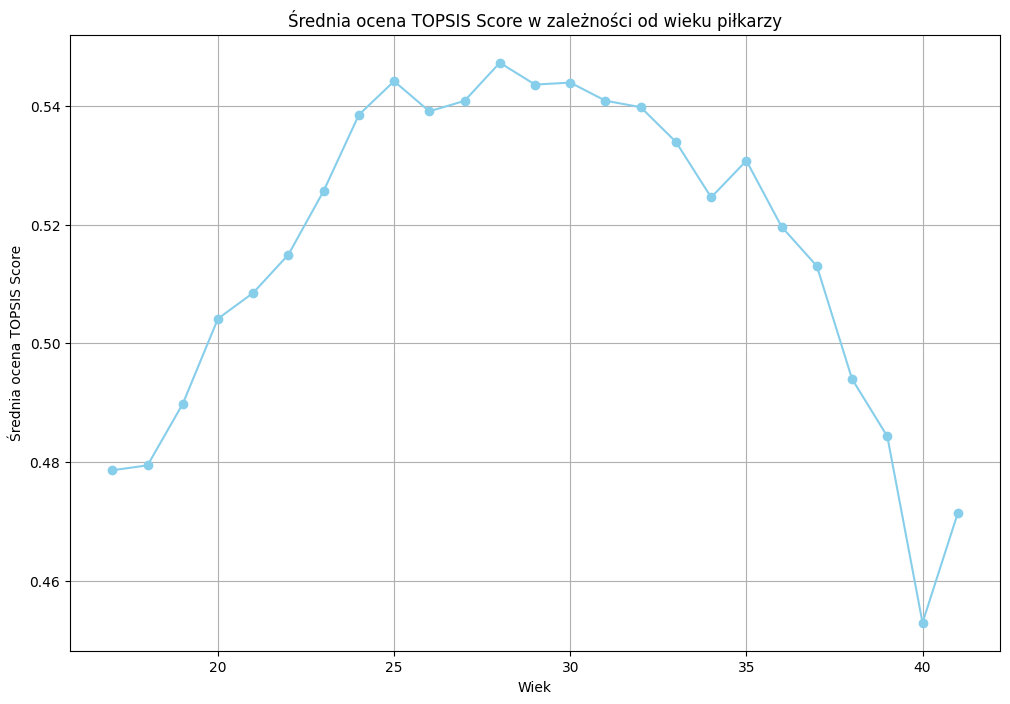

In [24]:
average_scores_by_age = sorted_data.groupby('age')['TOPSIS Score'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_age.index, average_scores_by_age.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Wiek')
plt.ylabel('Średnia ocena TOPSIS Score')
plt.title('Średnia ocena TOPSIS Score w zależności od wieku piłkarzy')
plt.grid(True)
plt.show()

# Metoda SSW

**Metoda statystyczna SSW**, czyli *Suma kwadratów odchyleń wewnątrzgrupowych*, jest miarą zmienności w obrębie poszczególnych grup w zbiorze danych. SSW jest wykorzystywana w analizie wariancji (ANOVA) do oceny, czy istnieją statystycznie istotne różnice między średnimi wartościami różnych grup.

$$
SSW = \sum_{i}^n\sum_{j}^m(x_i-x_j)^2
$$
$x_i$ - wartość i-tej obserwacji w j-tej grupie <br>
$x_j$ - średnia arytmetyczna j-tej grupy

**Interpretacja**:<br>
- *Mała wartość SSW*: Oznacza to, że dane w obrębie grup są homogeniczne, czyli mało zróżnicowane. Innymi słowy, obserwacje w danej grupie są zbliżone do siebie pod względem wartości cechy, którą badamy.
- *Duża wartość SSW*\: Oznacza to, że dane w obrębie grup są heterogeniczne, czyli zróżnicowane. Innymi słowy, obserwacje w danej grupie różnią się między sobą pod względem wartości cechy, którą badamy.

In [22]:
features = ['dribbling', 'reactions', 'interceptions', 'vision', 'stamina', 
            'strength', 'balance', 'sprint_speed', 'agility', 'ball_uncontrol', 'instability']
weights = dict(zip(features, weights))
data['ssw'] = numeric_data.apply(lambda row: sum(row[feature] * weight for feature, weight in weights.items()), axis=1)
ranked_players = data.sort_values(by='ssw', ascending=False)
print(ranked_players)
ranked_players.to_excel("posortowane_wedlug_ssw.xlsx", index=False)

                     player      country  height  age                club  \
3863      Federico Valverde      Uruguay     182   25        Real Madrid    
3844               Emre Can      Germany     186   29  Borussia Dortmund    
1319         Renato Sanches     Portugal     176   26           Paris SG    
3133                Canales        Spain     176   32         Real Betis    
2327  Franck Yannick Kessié  Ivory Coast     183   26       FC Barcelona    
...                     ...          ...     ...  ...                 ...   
3725          Barry Lauwers  Netherlands     187   23        FC Volendam    
850           Edoardo Sarri        Italy     187   24               Bari    
2920        Paul Tschernuth      Austria     186   21         Heidenheim    
4843        Hamilton Acuria      Ecuador     187   35          LDU Quito    
4799         Alexandru Utiu      Romania     192   20    FC Hermannstadt    

      dribbling  reactions  interceptions  vision  stamina  strength  balan

## Wnioski
- **Najlepsi:**  Pedri, Mohamed Salah, Federico Valverde
- **Najgorsi:** Alexandru Utiu, Ghjuvanni Quilichini, Paul Tschernuth

Ranking wykorzystujący metodę SSW jest lepszy od metody TOPSIS.

Jest to metoda z dużą wrażliwością na wartości odstające, których w naszych danych jest sporo. Metoda SSW nie uwzględnia wag zmiennych. Oznacza to, że wszystkie zmienne są traktowane jako równie ważne, co nie zawsze jest zgodne z rzeczywistością.<br>Nieprawdą byłoby stwierdzenie, że umiejętność przeglądu pola (vision) ma taką samą wagę jak prędkość piłkarza podczas sprintów (sprint_speed).
## Wykresy

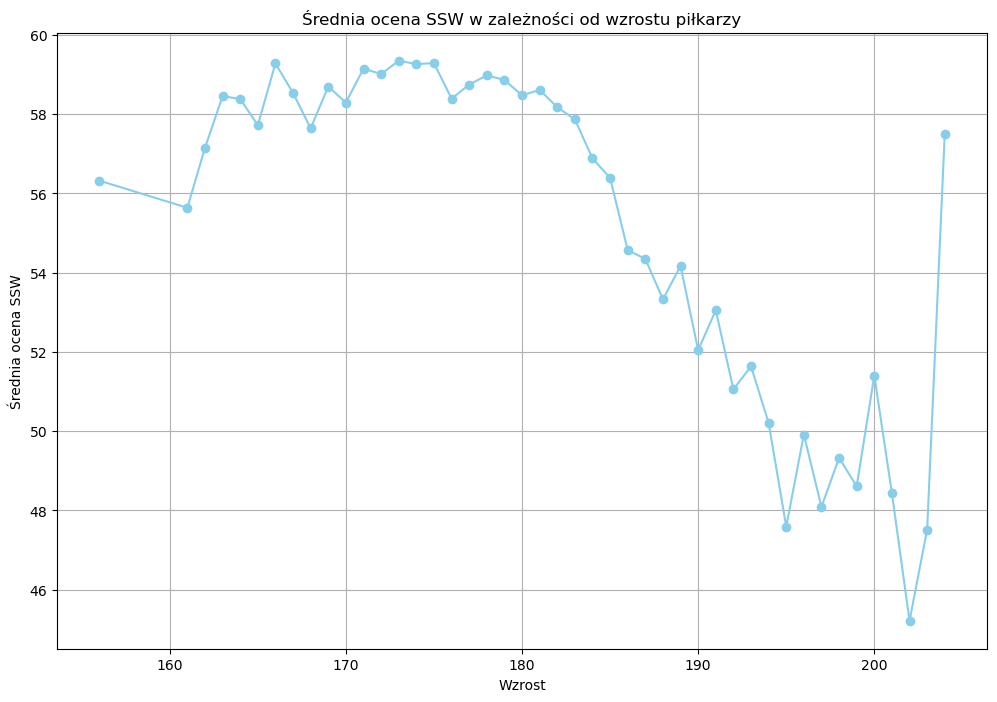

In [23]:
average_scores_by_height = data.groupby('height')['ssw'].mean()
plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_height.index, average_scores_by_height.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Wzrost')
plt.ylabel('Średnia ocena SSW')
plt.title('Średnia ocena SSW w zależności od wzrostu piłkarzy')
plt.grid(True)
plt.show()

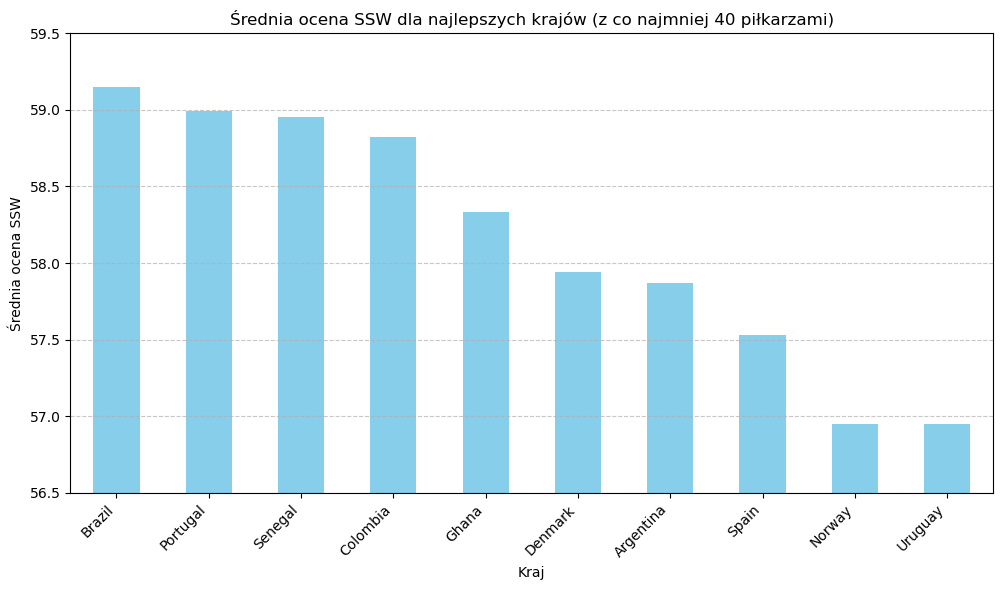

In [24]:
players_count_by_country = sorted_data['country'].value_counts()

top_countries = players_count_by_country[players_count_by_country >= 40].index

average_scores_by_country = data[data['country'].isin(top_countries)].groupby('country')['ssw'].mean()

top_countries = average_scores_by_country.nlargest(10).index

top_countries_data = sorted_data[sorted_data['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
bar_plot = average_scores_by_country[top_countries].plot(kind='bar', color='skyblue')
plt.xlabel('Kraj')
plt.ylabel('Średnia ocena SSW')
plt.title('Średnia ocena SSW dla najlepszych krajów (z co najmniej 40 piłkarzami)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

bar_plot.set_ylim(56.5, 59.5)

plt.show()

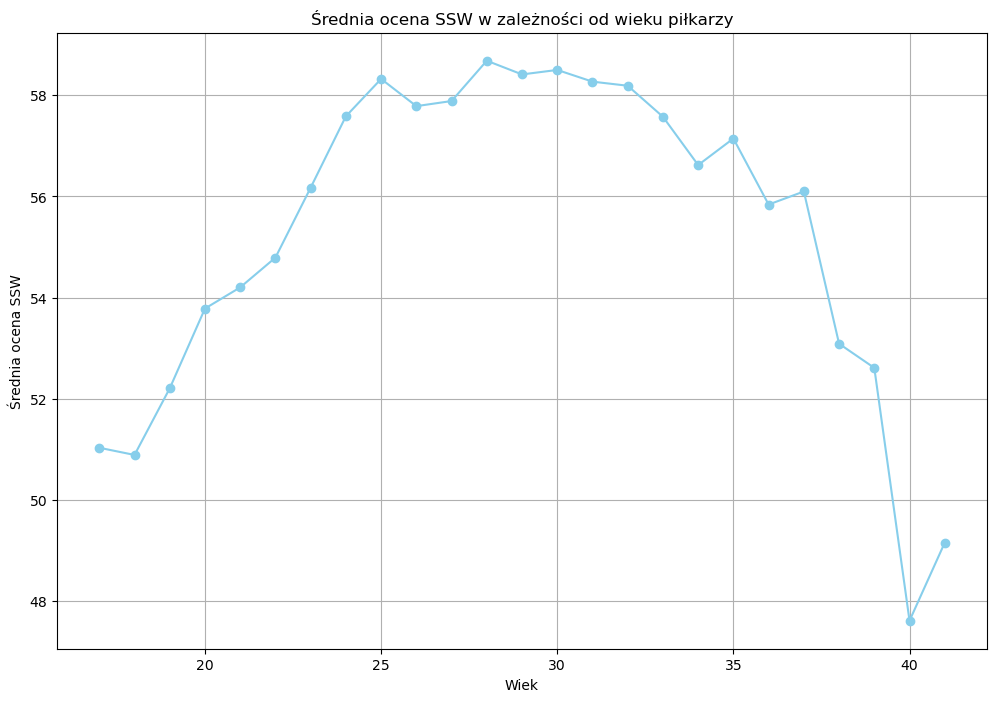

In [25]:
average_scores_by_age = data.groupby('age')['ssw'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_age.index, average_scores_by_age.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Wiek')
plt.ylabel('Średnia ocena SSW')
plt.title('Średnia ocena SSW w zależności od wieku piłkarzy')
plt.grid(True)
plt.show()

# Metoda Nowaka



# Metoda regresji liniowej

Metoda regresji liniowej jest statystyczną metodą modelowania zależności między zmienną zależną a jedną lub kilkoma zmiennymi niezależnymi. Model regresji liniowej zakłada, że zależność między zmiennymi jest liniowa, czyli można ją przedstawić za pomocą równania prostego $y = ax + b$

$$
a = \frac{\sum_{i=1}^n (x_i-\bar x)(y_i-\bar y)}{\sum_{i=1}^n (x_i-\bar x)^2}
$$ $$
b = \bar y - a\bar x
$$

$b$ - współczynnik regresji (dla predyktora, przy predyktorze)<br>
$x_i$ - wyniki dla predyktora, kolejne obserwacje zmiennej wyjaśniającej<br>
$y_i$ - wyniki dla zmiennej zależnej, kolejne obserwacje zmiennej wyjaśnianej<br>
$\bar x$ - średnia obserwowana wartość zmiennej wyjaśniającej, predykatora<br>
$\bar y$ - średnia obserwowana wartość zmiennej wyjaśnianej, zależnej

In [26]:
columns = ['dribbling', 'reactions', 'interceptions', 'vision', 'stamina', 'strength', 'balance', 'sprint_speed', 'agility', 'ball_uncontrol', 'instability']
X = data[columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

weights = [0.02857143, 0.14285714, 0.02857143, 0.14285714, 0.05714286, 0.14285714, 0.08571429, 0.05714286, 0.02857143, -0.02857143, -0.02857143]
data['regresja liniowa'] = (X_scaled * weights).sum(axis=1)

sorted_data = data.sort_values(by='regresja liniowa', ascending=False)

print(sorted_data)

                    player        country  height  age              club  \
5676         Mohamed Salah          Egypt     175   31         Liverpool   
5229         Kylian Mbappé         France     182   24         Paris SG    
3555          Lionel Messi      Argentina     169   36         Paris SG    
4849       Kevin De Bruyne        Belgium     181   32  Manchester City    
5675         Karim Benzema         France     185   35       Real Madrid   
...                    ...            ...     ...  ...               ...   
293        Harry Griffiths        England     187   18    AFC Wimbledon    
4156        Emmanuel Ochoa  United States     188   18   SJ Earthquakes    
2920       Paul Tschernuth        Austria     186   21       Heidenheim    
3957  Ghjuvanni Quilichini         France     185   21       AC Ajaccio    
4799        Alexandru Utiu        Romania     192   20  FC Hermannstadt    

      dribbling  reactions  interceptions  vision  stamina  strength  balance  \
5676  

## Wnioski
- **Najlepsi:**  Mohamed Salah, Kylian Mbappé, Lionel Messi
- **Najgorsi:** Alexandru Utiu, Ghjuvanni Quilichini, Paul Tschernuth
  
Regresja liniowa najlepiej z powyższych metod przewiduje oceny piłkarzy, ponieważ zostały spełnione jej założenia tj. m.in.: 
- liniowa zależność między zmienną zależną, a zmiennymi niezależnymi,
- zmienne niezależne nie są liniowo zależne od siebie,
- mamy dużą ilość danych

## Wykresy

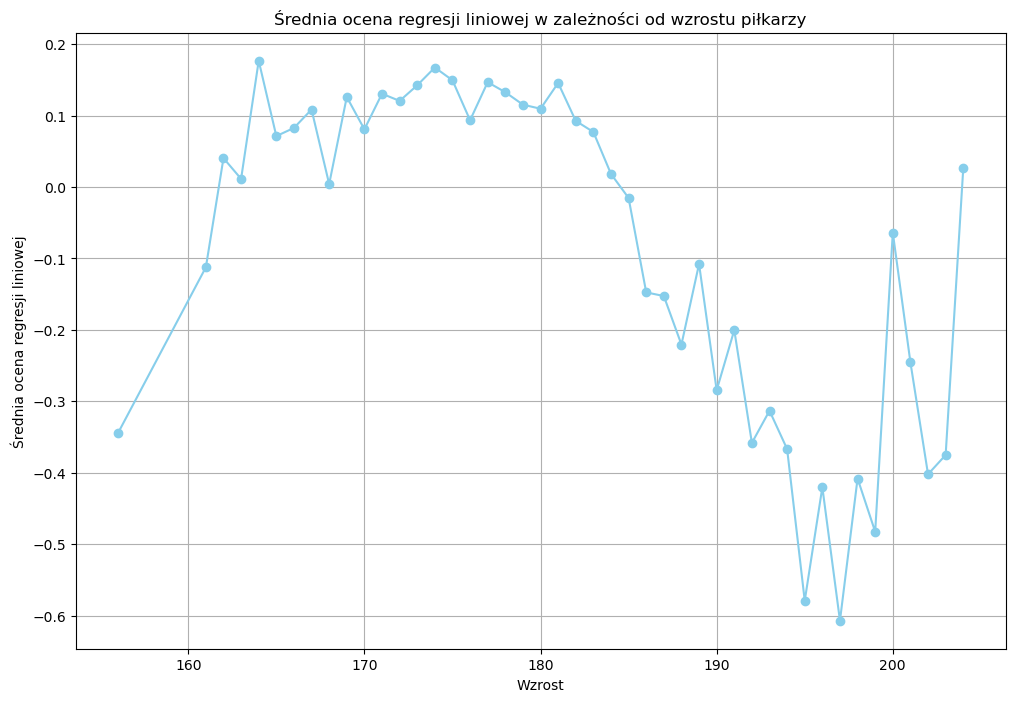

In [27]:
average_scores_by_height = sorted_data.groupby('height')['regresja liniowa'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_height.index, average_scores_by_height.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Wzrost')
plt.ylabel('Średnia ocena regresji liniowej')
plt.title('Średnia ocena regresji liniowej w zależności od wzrostu piłkarzy')
plt.grid(True)
plt.show()

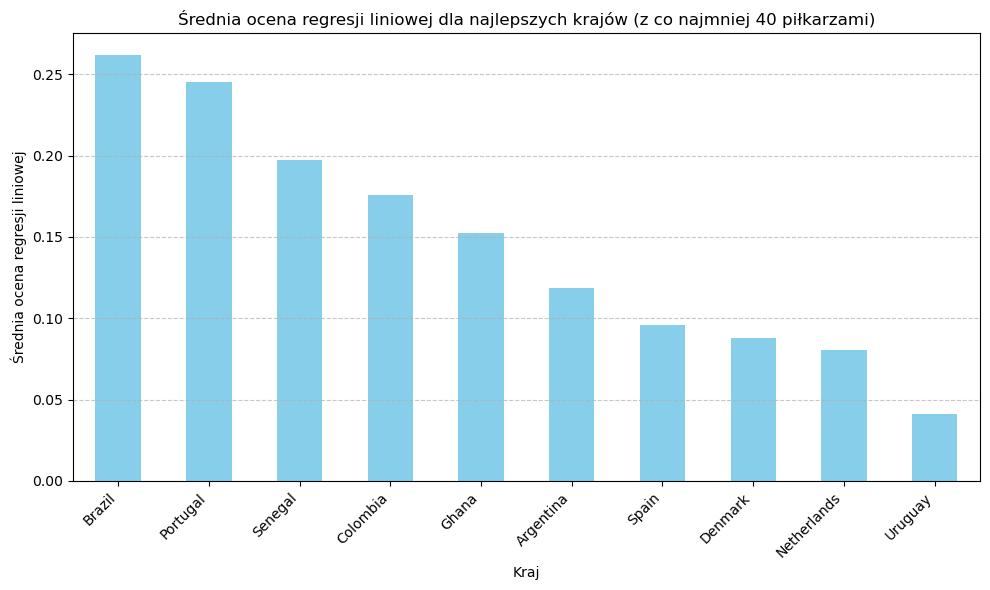

In [28]:
players_count_by_country = sorted_data['country'].value_counts()

top_countries = players_count_by_country[players_count_by_country >= 40].index

average_scores_by_country = sorted_data[sorted_data['country'].isin(top_countries)].groupby('country')['regresja liniowa'].mean()

top_countries = average_scores_by_country.nlargest(10).index

top_countries_data = sorted_data[sorted_data['country'].isin(top_countries)]

plt.figure(figsize=(10, 6))
average_scores_by_country[top_countries].plot(kind='bar', color='skyblue')
plt.xlabel('Kraj')
plt.ylabel('Średnia ocena regresji liniowej')
plt.title('Średnia ocena regresji liniowej dla najlepszych krajów (z co najmniej 40 piłkarzami)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

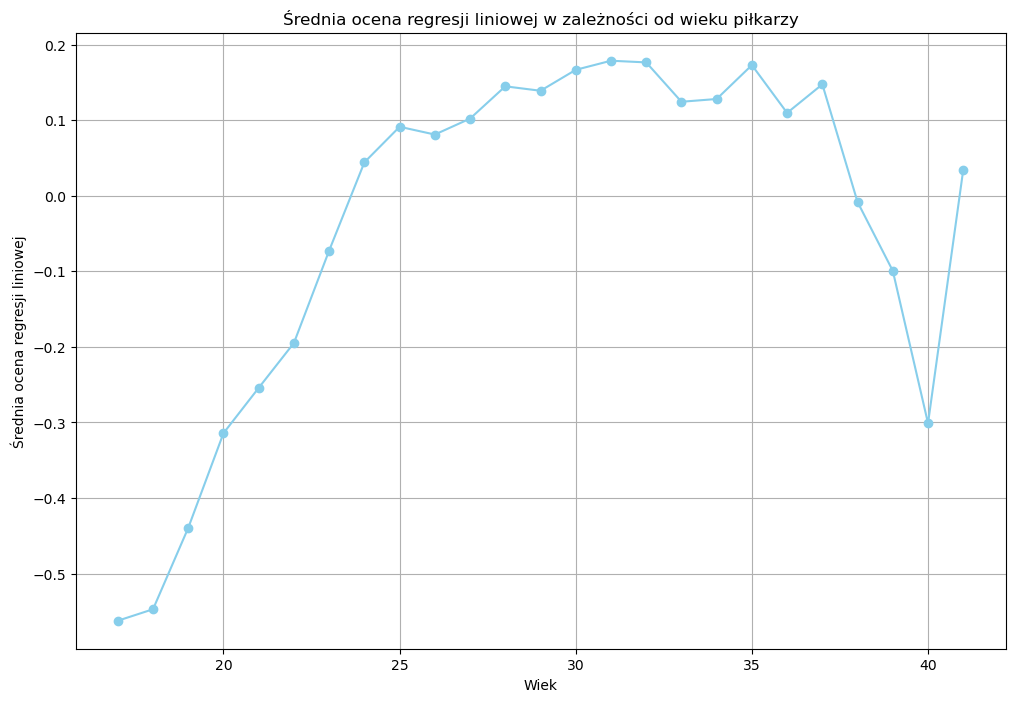

In [29]:
average_scores_by_age = sorted_data.groupby('age')['regresja liniowa'].mean()

plt.figure(figsize=(12, 8))
plt.plot(average_scores_by_age.index, average_scores_by_age.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Wiek')
plt.ylabel('Średnia ocena regresji liniowej')
plt.title('Średnia ocena regresji liniowej w zależności od wieku piłkarzy')
plt.grid(True)
plt.show()

# Wnioski końcowe

Wyniki regresji liniowej są bardziej stabilne i spójne w porównaniu z TOPSIS i SSW.<br>
Wariancja średniej oceny piłkarzy w grupach o tej samej wysokości była mniejsza w przypadku regresji liniowej.

- Regresja liniowa jest najlepszą metodą do rankingu piłkarzy, ze względu na jej dokładność, stabilność i prostotę.- 
Metoda TOPSIS może być bardziej odpowiednia, jeśli priorytetem jest subiektywna identyfikacja najlepszych piłkarzy przez własne przydzielenie wag dla zmiennych.
- 
Metoda SSW może być użyteczna do porównania średnich ocen piłkarzy o różnych wysokościach, ale należy zwrócić uwagę na jej wrażliwość na wartości odstające.

## Bibliografia
- [Regresja liniowa 1](https://matematyka.poznan.pl/artykul/regresja-liniowa-czyli-o-zastosowaniu-funkcji-liniowej-w-analizie-statystycznej/)
- [Regresja liniowa 2](https://pogotowiestatystyczne.pl/slowniki/regresja-liniowa/)
- [SSW](https://study.com/skill/learn/how-to-calculate-the-total-sum-of-squares-within-and-between-ssw-and-ssb-explanation.html)
- [TOPSIS](https://repozytorium.uwb.edu.pl/jspui/bitstream/11320/7542/1/Optimum_4_2018_D_Kacprzak_Przedzialowa_metoda_TOPSIS.pdf)